In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv(r"C:\Users\banny\Downloads\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
df.shape

(6362620, 11)

In [11]:
missing_values = df.isnull().sum()
print("Missing values:\n",missing_values)

Missing values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [12]:
duplicate_rows= df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


This helps you understand if the dataset is imbalanced 


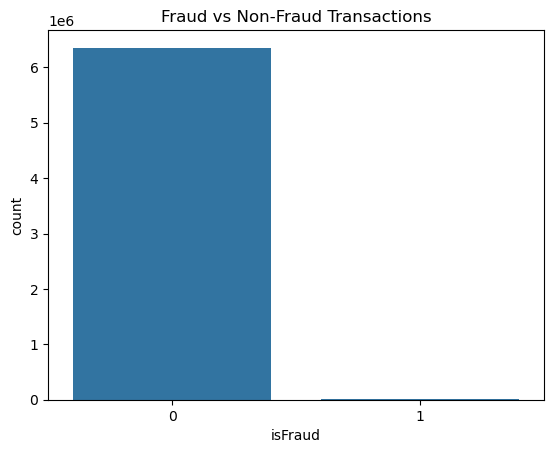

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [5]:
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

print(df['isFraud'].value_counts(normalize=True)*100)

Exploratory Data Analysis (EDA)


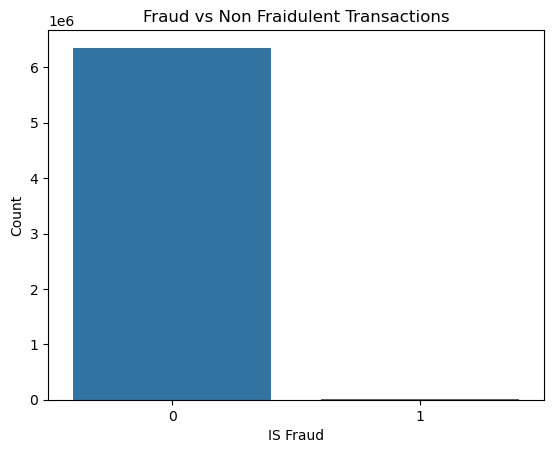

isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='isFraud', data=df)
plt.title("Fraud vs Non Fraidulent Transactions")
plt.xlabel("IS Fraud")
plt.ylabel("Count")
plt.show()

fraud_percent=df['isFraud'].value_counts(normalize=True)*100
print(fraud_percent)

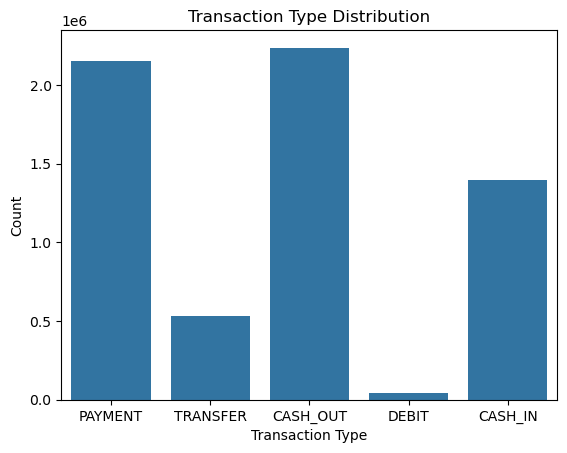

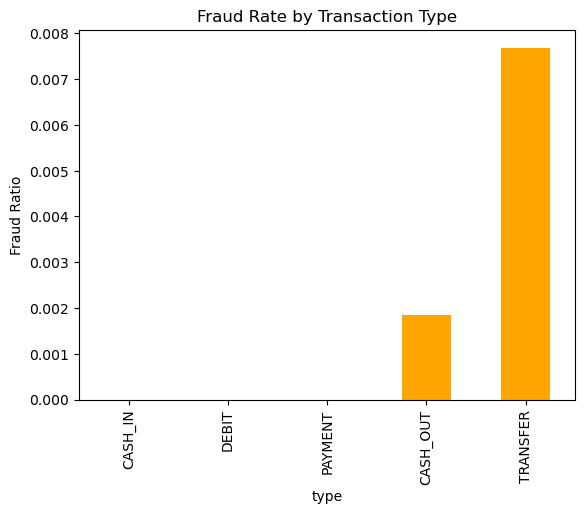

In [ ]:
sns.countplot(x='type',data=df)
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


fraud_by_type= df.groupby('type')['isFraud'].mean().sort_values(ascending=True)
fraud_by_type.plot(kind='bar', color='orange')
plt.title("Fraud Rate by Transaction Type")
plt.ylabel("Fraud Ratio")
plt.show()

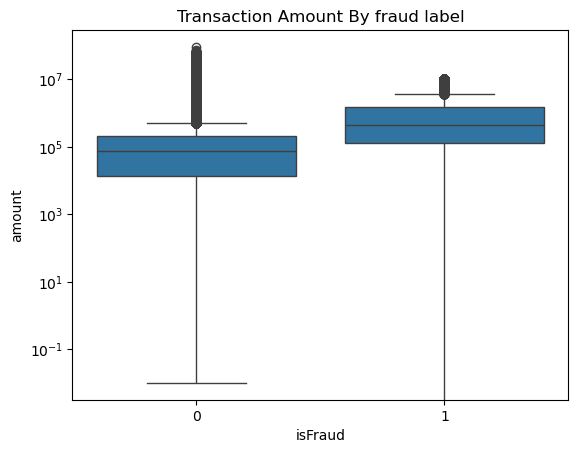

In [ ]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.yscale('log')  # log scale for better visibility
plt.title("Transaction Amount By fraud label")
plt.show()
#Helps identify multicollinearity and relationships between features.

=> Removing non-useful columns

=> Creating new helpful features

=> Encoding categorical values

In [10]:
df= df.drop(['nameOrig','nameDest'],axis=1)

In [11]:
df['errorBalancingOrig']=df['oldbalanceOrg'] - df['newbalanceOrig']- df['amount']
df['errorBalancingDest']=df['oldbalanceDest'] - df['newbalanceDest'] + df['amount']

In [12]:
df=pd.get_dummies(df, columns=['type'], drop_first=True)

In [13]:
### check columns now whether its change or not


df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalancingOrig,errorBalancingDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1.455192e-11,9839.64,False,False,True,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,-1.136868e-12,1864.28,False,False,True,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0.000000e+00,181.00,False,False,False,True
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0.000000e+00,21363.00,True,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.000000e+00,11668.14,False,False,True,False


In [18]:
df.dtypes

step                    int64
amount                float64
oldbalanceOrg         float64
newbalanceOrig        float64
oldbalanceDest        float64
newbalanceDest        float64
isFraud                 int64
isFlaggedFraud          int64
errorBalancingOrig    float64
errorBalancingDest    float64
type_CASH_OUT            bool
type_DEBIT               bool
type_PAYMENT             bool
type_TRANSFER            bool
dtype: object

In [14]:
### Define the model features and target variable
x=df.drop(['isFraud','isFlaggedFraud'], axis=1)
y=df['isFraud']


In [15]:
### Train and test split the data model
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42,stratify=y)

In [16]:
model=RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')
model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [20]:
print(x.columns)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'errorBalancingOrig', 'errorBalancingDest',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [38]:
y_pred=model.predict(x_test)

In [40]:
#Confusion Matrix
print("Cofusion Matrix:")
print(confusion_matrix(y_test,y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

#Accuracy Score
print("Accuracy Score")
print(accuracy_score(y_test,y_pred))

y_proba = model.predict_proba(x_test)[:,1]
print("\nnROC AUC Score:")
print(roc_auc_score(y_test,y_proba))

Cofusion Matrix:
[[1906322       0]
 [      9    2455]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       1.00      1.00      1.00      2464

    accuracy                           1.00   1908786
   macro avg       1.00      1.00      1.00   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy Score
0.9999952849612267

nROC AUC Score:
0.9981726905853329


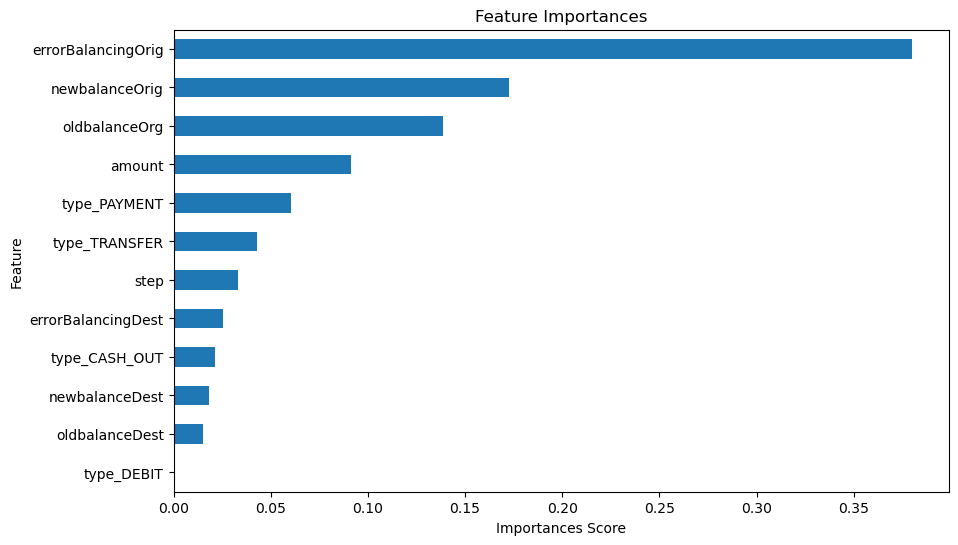

In [42]:
importances = pd.Series(model.feature_importances_,index=x.columns)
importances.sort_values().plot(kind='barh',figsize=(10,6),title='Feature Importances')
plt.xlabel("Importances Score")
plt.ylabel("Feature")
plt.show()

After seeing the graph, pick the top 3–5 features and interpret:

|Feature	| Possible Meaning|
|-----------|-----------------|
|amount|	Fraud often involves large sums.
|errorBalanceOrig |Sudden mismatches in sender balance can indicate fraud.	
|type_TRANSFER	|Fraud is more likely during transfers.
|oldbalanceDest|	Zero or empty recipient accounts receiving money can be suspicious.
|newbalanceOrig|	Fraud often drains the sender’s account to near-zero.


What Kind of Prevention Should Be Adopted? Here are practical suggestions the company can implement based on your model insights:

|Recommendation	 |Explanation|
|----------------|-----------|
|🚨 Real-time flagging system	|Use the trained model to monitor incoming transactions and flag potential frauds immediately.|
|💸 Transaction limit alerts	|Auto-flag large transactions (like > ₹2,00,000) — especially if user balance suddenly drops.|
|🧠 Risk-based authentication	|For risky transfers (e.g., type = TRANSFER or CASH_OUT), prompt two-factor authentication.|
|🕵️ Watch for zero balances	|Flag transactions where sender/receiver balances are zero — commonly seen in fraud patterns.|
|🔁 Model retraining monthly	|Retrain model on fresh data regularly to adapt to new fraud patterns.|

To measure success, use fraud KPIs:

|Metric	|Meaning|
|-------|-------|
|✅ Fraud Detection Rate|	% of actual frauds the model caught. (True Positives / Actual Frauds)|
|❌ False Positive Rate|	% of genuine transactions wrongly flagged.|
|⏳ Time to detect fraud|	Shorter = better.|
|🧩 Precision & Recall	|Keep tracking model performance after updates.|
|💰 Money saved	|Estimate total value of blocked fraudulent transactions.|